In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [3]:
file_path = "D:\\excel data\\global_superstore.xlsx"
df = pd.read_excel(file_path)

In [39]:
#file_path = "D:\\excel data\\global_superstore\\Returns.xlsx"
#df = pd.read_excel(file_path)

In [43]:
file_path = "D:\\excel data\\global_superstore.xlsx"
#filepath = "D:\\excel data\\global_superstore.xlsx"

f = pd.ExcelFile(file_path)
#f = pd.ExcelFile(filepath)


list_of_df = []
#list_of_dfs = []


for sheet in f.sheet_names:
    df = f.parse(sheet)
    list_of_df.append(df)
    
data = pd.concat(list_of_df, ignore_index = True)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Person
0,40098.0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2.0,0.0,62.1544,40.77,High,NaN,NaN
1,26341.0,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical,NaN,NaN
2,25330.0,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium,NaN,NaN
3,13524.0,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium,NaN,NaN
4,47221.0,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52388,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Katlego Akosua
52389,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaoru Xun
52390,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angela Jephson
52391,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gilbert Wolff


In [17]:
import pandas as pd

# Define filepath

filepath = "D:\\excel data\\global_superstore.xlsx"

# Load Excel file using Pandas
f = pd.ExcelFile(filepath)

# Define an empty list to store individual DataFrames
list_of_dfs = []

# Iterate through each worksheet
for sheet in f.sheet_names:
    
    # Parse data from each worksheet as a Pandas DataFrame
    df = f.parse(sheet)
    
    # And append it to the list
    list_of_dfs.append(df)
    
# Combine all DataFrames into one
data = pd.concat(list_of_dfs, ignore_index=True)

# Preview first 10 rows
#data.head(10)
data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Person
0,40098.0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.980,2.0,0.0,62.1544,40.77,High,NaN,NaN
1,26341.0,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical,NaN,NaN
2,25330.0,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium,NaN,NaN
3,13524.0,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium,NaN,NaN
4,47221.0,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52388,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Katlego Akosua
52389,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaoru Xun
52390,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angela Jephson
52391,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gilbert Wolff


In [19]:
data.tail(24)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Person
52369,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marilène Rousseau
52370,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andile Ihejirika
52371,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nicodemo Bautista
52372,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cansu Peynirci
52373,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lon Bonher
52374,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wasswa Ahmed
52375,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hadia Bousaid
52376,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lynne Marchand
52377,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxana Lagunov
52378,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dolores Davis


In [28]:

print(data.Returned)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
52388    NaN
52389    NaN
52390    NaN
52391    NaN
52392    NaN
Name: Returned, Length: 52393, dtype: object


In [4]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [5]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
df.drop(["Postal Code","Row ID"], axis = 1,inplace = True)

In [8]:
df.head(4)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium


In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority'],
      dtype='object')

In [4]:
df = pd.read_csv("D:\\excel data\\wine_data.csv", header = None, usecols = [0,1,2])
df.columns = ["class_label","Alcohol","Malic_acid"]

In [5]:
df.head(5)

,class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Malic_acid'>

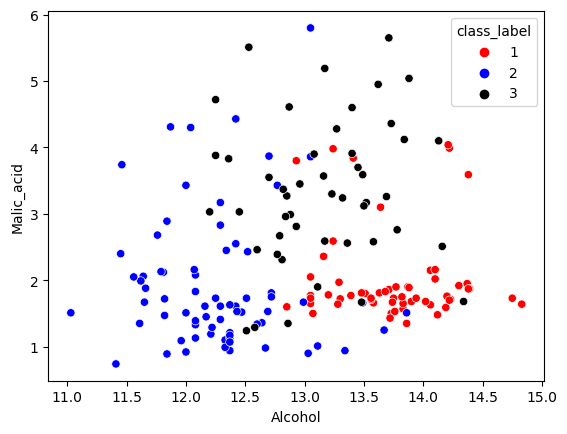

In [6]:
color_dict = {1:"red", 2:"blue", 3:"black"}
sns.scatterplot(x = df["Alcohol"],y = df["Malic_acid"], hue = df["class_label"], palette = color_dict)

<Axes: xlabel='Alcohol', ylabel='Density'>

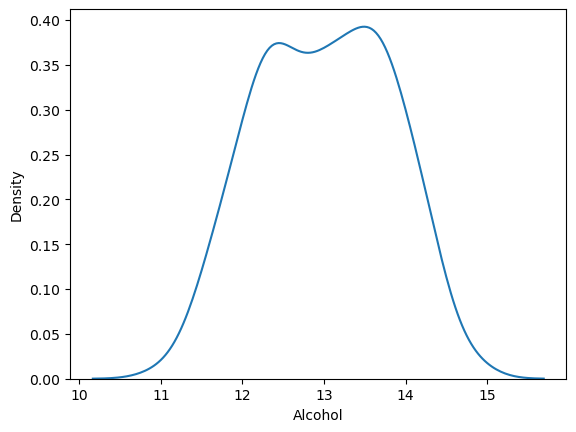

In [7]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic_acid', ylabel='Density'>

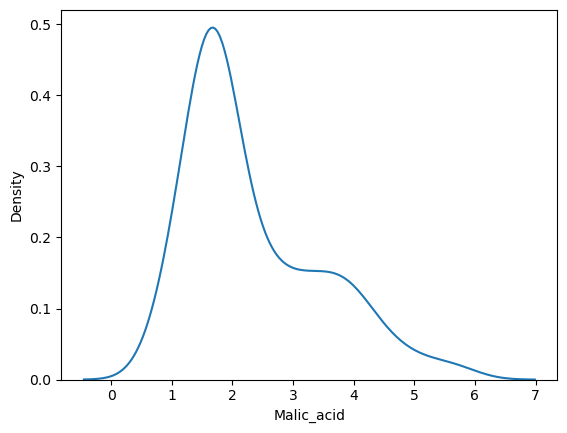

In [8]:
sns.kdeplot(df["Malic_acid"])

In [9]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("class_label",axis = 1),df["class_label"],test_size = 0.3, random_state = 0)

In [36]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [37]:
y_train.shape,y_test.shape

((124,), (54,))

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = StandardScaler()
scaler = MinMaxScaler()

In [40]:
scaler.fit(x_train)

MinMaxScaler()

In [41]:
x_train_scaled = scaler.transform(x_train)

In [42]:
x_test_scaled = scaler.transform(x_test)

In [46]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [47]:
np.round(x_train.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [48]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0
